In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image

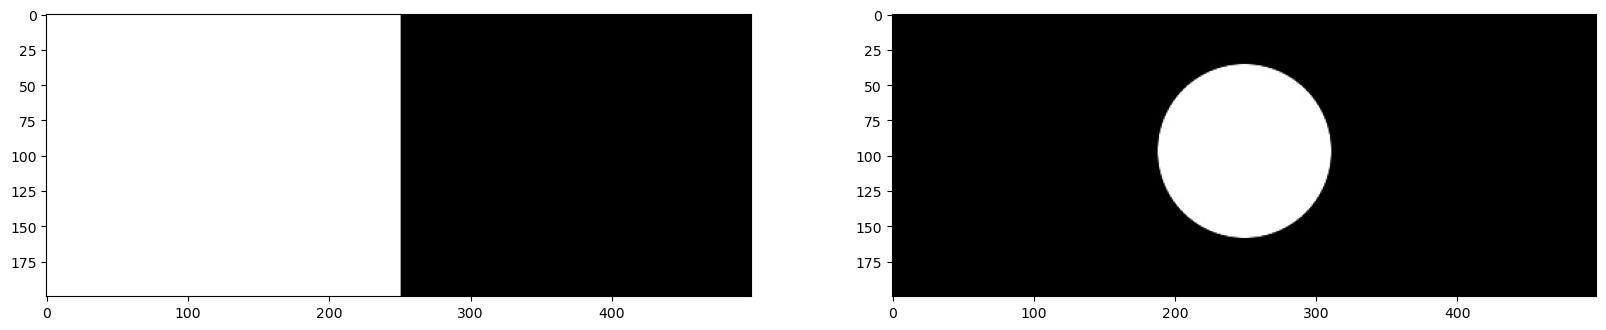

In [3]:
imgRec = cv2.imread("rectangle.jpg", 0)
imgCirc = cv2.imread("circle.jpg", 0)

plt.figure(figsize = [20, 5])
plt.subplot(121); plt.imshow(imgRec, cmap = 'gray')
plt.subplot(122); plt.imshow(imgCirc, cmap = 'gray')

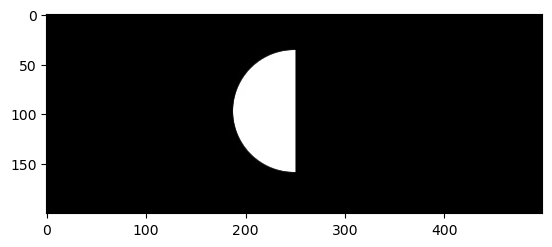

In [4]:
resAnd = cv2.bitwise_and(imgRec, imgCirc)
plt.imshow(resAnd, cmap = 'gray')

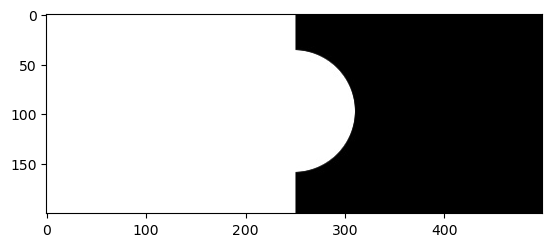

In [5]:
resOr = cv2.bitwise_or(imgRec, imgCirc)
plt.imshow(resOr, cmap = 'gray')

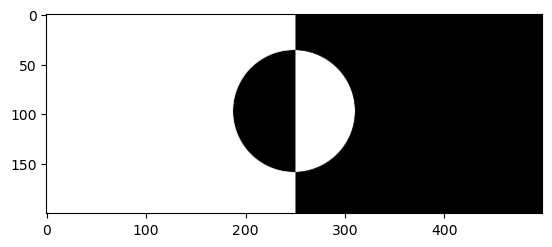

In [6]:
resXor = cv2.bitwise_xor(imgRec, imgCirc)
plt.imshow(resXor, cmap = 'gray')

(700, 700, 3)


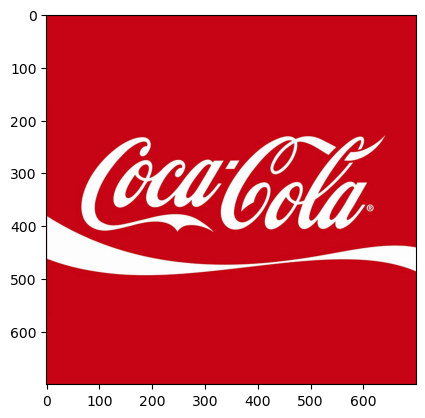

In [7]:
imgCoca = cv2.imread("coca-cola-logo.png", 1)[:,:,::-1]
print(imgCoca.shape)
plt.imshow(imgCoca)

(1800, 1800, 3)


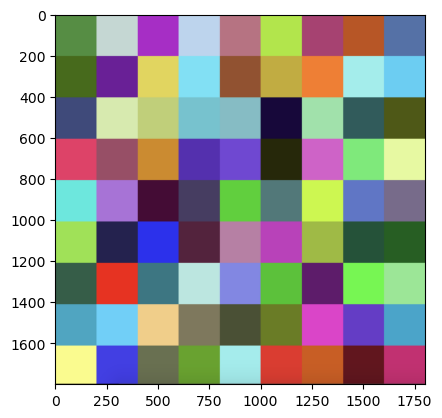

In [9]:
imgBackgr = cv2.imread("checkerboard_color.png", 1)[:,:,::-1]
print(imgBackgr.shape)
plt.imshow(imgBackgr)

In [10]:
ratio = imgCoca.shape[0] / imgBackgr.shape[1]
dim = (imgCoca.shape[0], int(imgBackgr.shape[0] * ratio))
print(dim)

(700, 700)


(700, 700, 3)


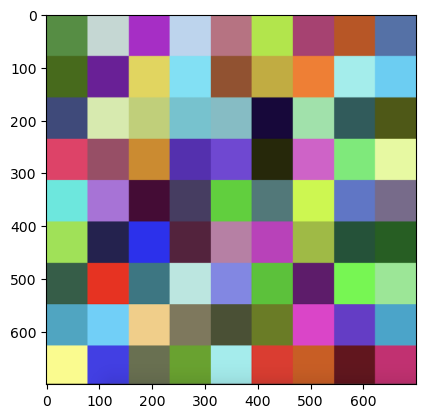

In [11]:
imgBackgrResize = cv2.resize(imgBackgr, dim)
print(imgBackgrResize.shape)
plt.imshow(imgBackgrResize)

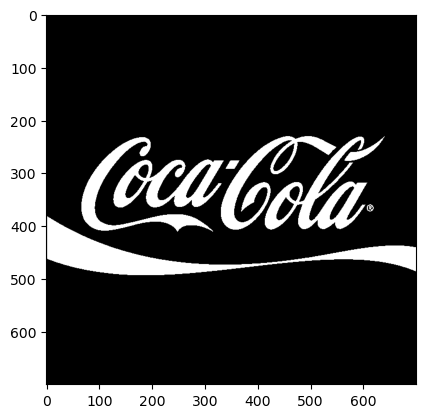

In [12]:
imgCocaGray = cv2.cvtColor(imgCoca, cv2.COLOR_RGB2GRAY)
retval, cocaMask = cv2.threshold(imgCocaGray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cocaMask, cmap = 'gray')

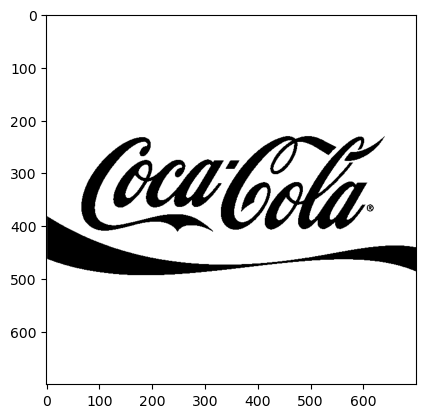

In [14]:
cocaMaskInv = cv2.bitwise_not(cocaMask)
plt.imshow(cocaMaskInv, cmap = 'gray')

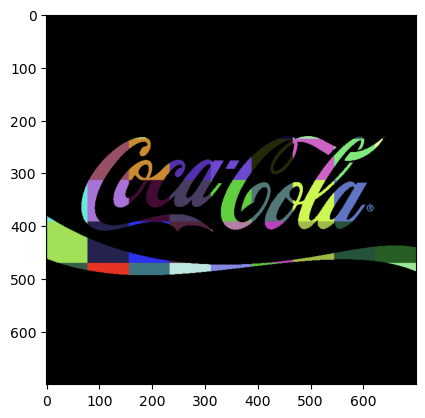

In [17]:
onlyBackgr = cv2.bitwise_and(imgBackgrResize, imgBackgrResize, mask=cocaMask)
plt.imshow(onlyBackgr)

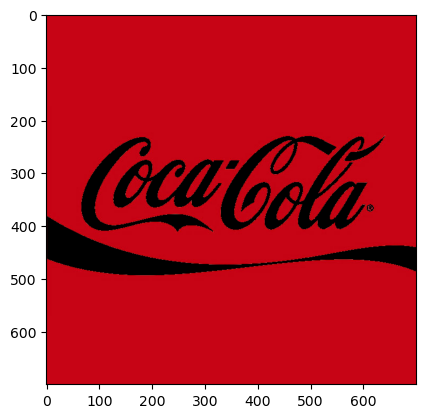

In [19]:
onlyForegr = cv2.bitwise_and(imgCoca, imgCoca, mask=cocaMaskInv)
plt.imshow(onlyForegr)

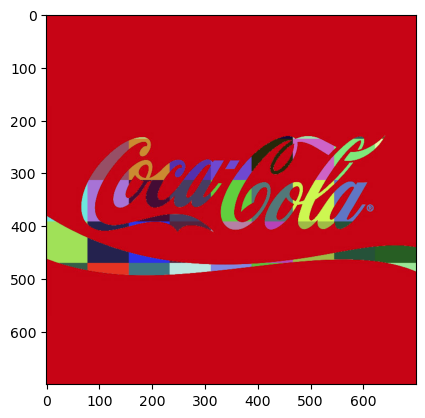

In [20]:
resCoca = cv2.add(onlyBackgr, onlyForegr)
plt.imshow(resCoca)